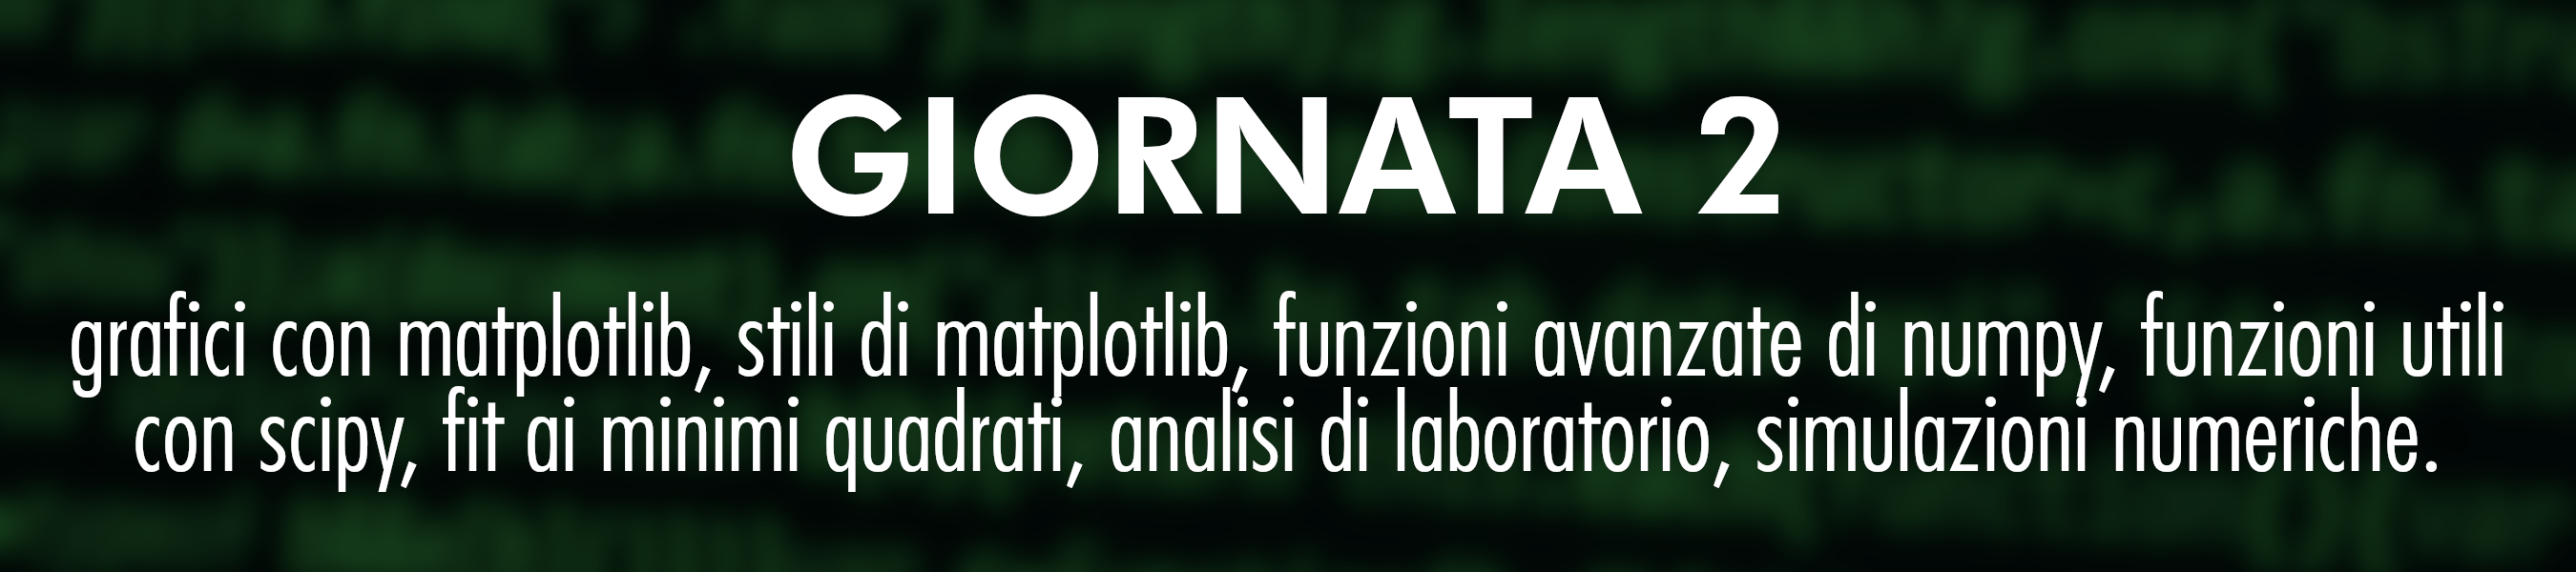

**Disclaimer!** Il materiale presente è fornito per il corso _"Python: Un Approccio Da Fisico"_ tenuto a _Maggio 2023_ per _AISF_ da _Alessandro Romancino_. Il materiale, distribuito con _licenza MIT_ è reperibile presso https://github.com/alex180500/aisf-corso-python.

# Introduzione a Matplotlib

[**Matplotlib**](https://matplotlib.org/stable/index.html) è la libreria di visualizzazione dati per eccellenza. Per approcciarla si possono usare [due interfacce](https://matplotlib.org/stable/users/explain/api_interfaces.html), quella _esplicita_, anche chiamata **Axes** che usa funzioni sugli oggetti `Axes`, oppure l'interfaccia _implicita_, o **pyplot**, che useremo per questo corso. [Clicca qui per più informazioni.](https://matplotlib.org/stable/tutorials/introductory/quick_start.html)

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.default_rng()

Per iniziare creiamo un semplice grafico di una funzione, inizializziamo un array di punti e applichiamo una funzione, questi saranno la nostra _x_ e la _y_, per generare segmenti tra tutti questi punti usiamo `plt.plot()`. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

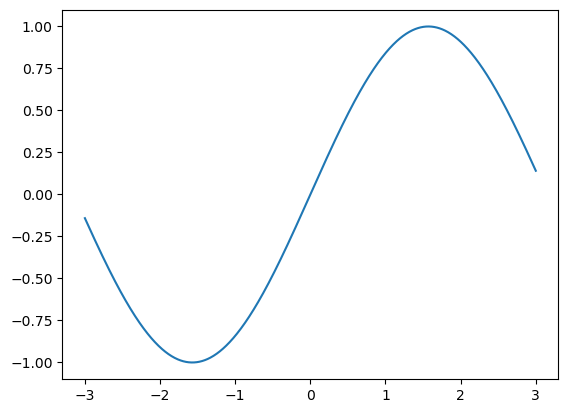

In [2]:
x = np.linspace(-3, 3, 1000)
y = np.sin(x)

plt.plot(x, y)

Ora invece facciamo inseriamo dei punti scatterati con del rumore con [`plt.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). Per modificare lo stile dei grafici si usano molti _**kwargs_. I più importanti sono _c_ (colore), _lw_ (linewidth o spessore), _ls_ (linestyle o stile) e _s_ (size o grandezza del marker) e _marker_ (tipo di marker) per lo scatterplot. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D)

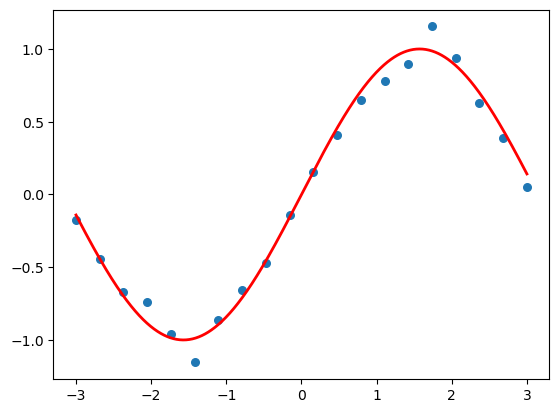

In [3]:
x_scat = np.linspace(-3, 3, 20)
y_scat = np.sin(x_scat) + rng.normal(scale=0.1, size=x_scat.size)

plt.plot(x, y, c="red", lw=2)
plt.scatter(x_scat, y_scat, s=30)

Qualsiasi parte della _Figure_ può essere modificata, però molto spesso è conveniente creare uno stile con tutte le proprie modifiche inserite di default. Questo può essere attivato con `plt.style.use()`. Matplotlib è dotato di [alcuni stili preinstallati](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html). Consiglio vivamente di scaricare gli [stili SciencePlots](https://github.com/garrettj403/SciencePlots) disponibili su GitHub. [Clicca qui per più informazioni.](https://matplotlib.org/stable/tutorials/introductory/customizing.html)

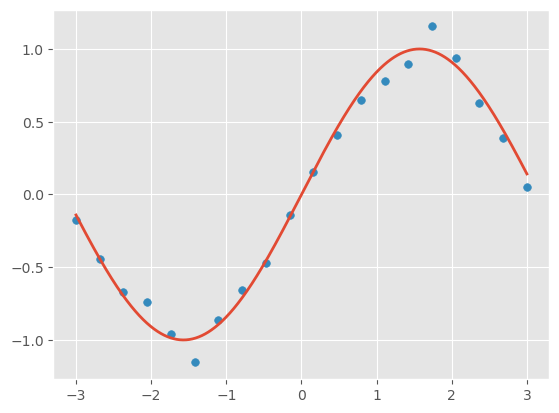

In [4]:
plt.style.use("ggplot")

plt.plot(x, y, c="C0", lw=2)
plt.scatter(x_scat, y_scat, c="C1", s=30)

Un'altra funzione molto comune per l'analisi dati in fisica è `plt.errorbar()` che permette di inserire le barre d'errore. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html)

<ErrorbarContainer object of 3 artists>

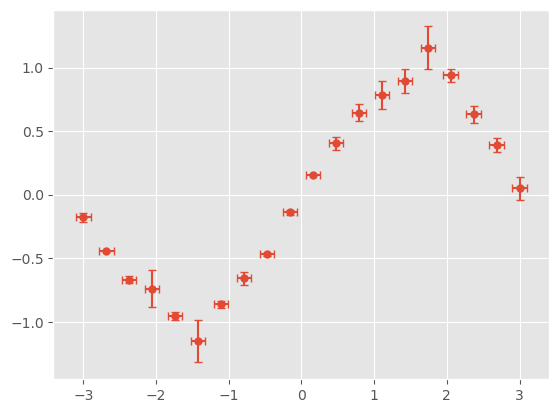

In [5]:
y_err = np.abs(y_scat - np.sin(x_scat))

plt.errorbar(x_scat, y_scat, yerr=y_err, xerr=0.1, fmt="o", ms=5, capsize=3)

Per quanto riguarda altre funzioni utili, eccone una carrellata per modificare il grafico...

Per cambiare le proporzioni della figure c'è [`plt.figure()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html). Per avere una legenda si esplicita il _label_ e poi si attiva con [`plt.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html). Per settare un asse in scala logaritmica si usa [`plt.xscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xscale.html) oppure [`plt.yscale()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yscale.html). Per settare i limiti manualmente si usano [`plt.xlim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) e [`plt.ylim()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html).

Per aggiungere titoli agli assi e alla figure si usano [`plt.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html), [`plt.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylabel.html) e [`plt.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html), nei titoli si può usare il formattatore in LaTeX. Per salvare la figure invece si usa [`plt.savefig()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.savefig.html) esplicitando il nome del file e la risoluzione con _dpi_.

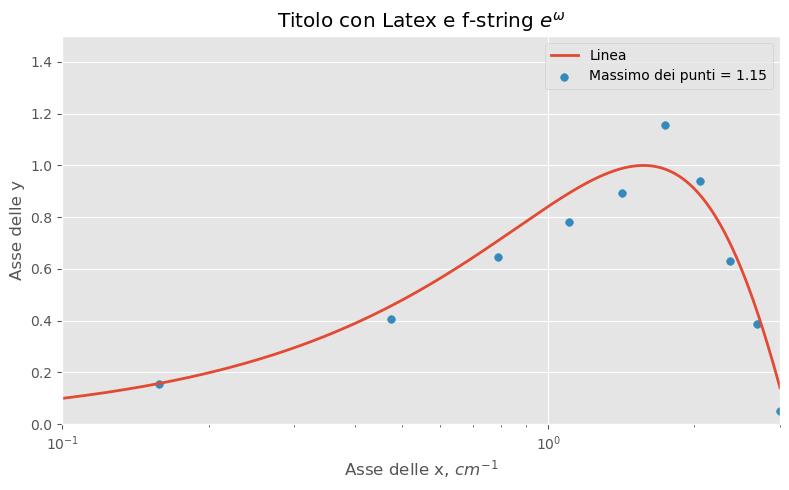

In [6]:
plt.figure(figsize=(8, 5))

plt.plot(x, y, c="C0", lw=2, label="Linea")
plt.scatter(x_scat, y_scat, c="C1", s=30, label=f"Massimo dei punti = {y_scat.max():.2f}")

plt.legend()
plt.xscale("log", base=10)
plt.xlim(1e-1, 3)
plt.ylim(0, 1.5)
plt.xlabel("Asse delle x, $cm^{-1}$")
plt.ylabel("Asse delle y")
plt.title(f"Titolo con Latex e f-string $e^{{\omega}}$")

plt.tight_layout()
# plt.savefig("images/log-graph.png", dpi=300)

# **Esempio 1:** Generazione Immagine Montecarlo

L'obiettivo è di generare l'immagine utilizzata per l'esempio in Giornata 1.

Per prima cosa generiamo la curva in forma parametrica, per un cerchio la cosa è abbastanza semplice. Basta inizializzare un angolo $\theta$ da $0$ a $2\pi$ e i punti sono identificati da seni e coseni.

In [7]:
theta = np.linspace(0, 2 * np.pi, 1000)
x_circle = np.cos(theta)
y_circle = np.sin(theta)

A questo punto generiamo i punti random come fatto nel primo notebook e usiamo la funzione `np.where()` per selezionare il colore _blue_ se la condizione è _True_ e _red_ se la condizione è _False_. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [8]:
x = rng.uniform(-1, 1, 1000)
y = rng.uniform(-1, 1, 1000)
colors = np.where(x**2 + y**2 < 1, "blue", "red")

Ora importiamo [`patches.Rectangle()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) che ci servirà per inserire il quadrato nero. Inoltre torniamo allo stile di _default_.

In [9]:
from matplotlib.patches import Rectangle

plt.style.use("default")

Ora per il plot finale usiamo `plt.plot()` per il cerchio e `plt.scatter()` per i punti, i colori sono già stati scelti precedentemente! Per inserire il rettangolo usiamo ora un poco di sintassi _esplicita_. Inizializziamo la _Figure_ e l'_Axes_ usando [`plt.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) questo ci permetterà di specificare il layout _constrained_ che rimuoverà spazio non necessario ai bordi e la _figsize_.

Il parametro _zorder_ permette di selezionare cosa viene imposto sopra a cosa nel caso di sovrapposizioni, un zorder maggiore corrisponde a un livello più in alto.

Per aggiungere il rettangolo creiamo la _patch_ usando la funzione appena importata e poi la aggiungiamo all'_Axes_ con [`Axes.add_patch()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html). Per finire usiamo [`Axes.axis()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axis.html) e lo settiamo in _off_ per nascondere gli assi.

(-1.1, 1.1, -1.1, 1.1)

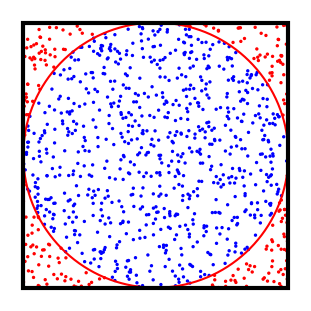

In [10]:
fig, ax = plt.subplots(figsize=(3, 3), layout="constrained")

plt.scatter(x, y, c=colors, s=2, zorder=1)
plt.plot(x_circle, y_circle, lw=1.5, c="red", zorder=2)

rect = Rectangle((-1, -1), 2, 2, lw=3, ec="black", fc="None", zorder=3)
ax.add_patch(rect)

ax.axis("off")
# plt.savefig("images/monte_carlo.png", dpi=100)

# **Esempio 2:** Analisi Dati con Integrale Numerico

L'obiettivo di questo esempio è analizzare dei dati di laboratorio per effettuare una integrazione numerica. _(Esempio molto didattico lo so, ma necessario)_

Per prima cosa impariamo a importare i dati. Quasi sempre io utilizzo `np.loadtxt()` che legge praticamente qualsiasi tipo di formato basato su testo. Bisogna indicare le colonne che si useranno con _usecols_, i delimitatori con _delimiter_ e il numero di righe da saltare in _skiprows_. _unpack_ permette di tirare fuori le colonne come array singoli. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html)

In [11]:
x_data, y_data = np.loadtxt(
    "data/dati_blackbody.txt", delimiter=" ", usecols=(0, 1), skiprows=1, unpack=True
)
x_data[0], y_data[0]

(-4.359002, 0.006)

Perfetto, ora plottiamo i dati per visualizzarli. Questo è uno step cruciale per l'analisi dati.

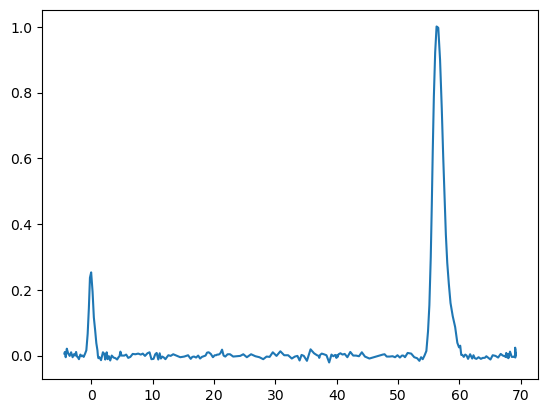

In [12]:
plt.plot(x_data, y_data)

Come si osserva dai dati siamo interessati ad effettuare l'integrazione numerica dei dati presenti nel range $[55, 60]$. Per selezionare questi intervalli per l'analisi dati usiamo una tecnica chiamata **boolean array indexing**. Questa consiste nel creare delle _maschere_ che andranno usate come indici degli array. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/user/basics.indexing.html#boolean-array-indexing)

In [13]:
mask = np.logical_and(x_data > 55, x_data < 60)
x_data[mask]

array([55.095312, 55.318485, 55.492275, 55.642324, 55.824661, 56.039287,
       56.267209, 56.545463, 56.835114, 57.113368, 57.353635, 57.57301 ,
       57.780039, 58.00796 , 58.260574, 58.538828, 58.898754, 59.292869,
       59.648996, 59.926301])

Per effettuare l'integrazione quindi ora semplicemente andiamo ad usare il metodo dei trapezi con `np.trapz()`. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.trapz.html)

In [14]:
trapezoid = np.trapz(y_data[mask], x_data[mask])
trapezoid

2.1925416139999987

Ora creiamo un bel grafico che rappresenti l'integrale con la funzione `plt.fill_between()`. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.fill_between.html)

(45.0, 65.0)

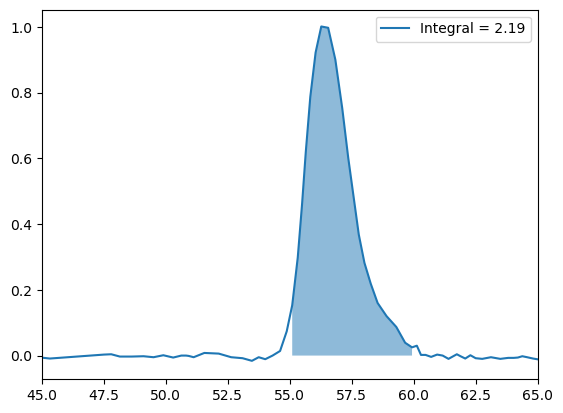

In [15]:
plt.plot(x_data, y_data, label=f"Integral = {trapezoid:.2f}")

plt.fill_between(x_data[mask], y_data[mask], 0, alpha=0.5)

plt.legend()
plt.xlim(45, 65)

# Funzioni Utili con SciPy

[SciPy](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide) è il coltellino svizzero delle librerie scientifiche in Python. Ha tutto quello che puoi immaginare in modo ottimizzato: [trasformate di Fourier](https://docs.scipy.org/doc/scipy/reference/fft.html), [integrazione numerica e soluzione di ODE](https://docs.scipy.org/doc/scipy/reference/integrate.html), [analisi di segnali e convoluzioni](https://docs.scipy.org/doc/scipy/reference/signal.html), [fit e ottimizzazioni](https://docs.scipy.org/doc/scipy/reference/optimize.html), [algebra lineare avanzata](https://docs.scipy.org/doc/scipy/reference/linalg.html) e perfino una routine per le [sparse matrices](https://docs.scipy.org/doc/scipy/reference/sparse.html). Imparare qualche funzione di questa libreria è sicuramente utile. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/tutorial/general.html)

In [16]:
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from scipy.integrate import simpson

plt.style.use("ggplot")

Una delle funzioni più comuni di SciPy è l'analisi di segnali in `scipy.signal`. Una funzione molto utile a noi fisici nell'analisi degli spettri è sicuramente la funzione `scipy.signal.find_peaks()` che permette di trovare automaticamente i picchi in un qualsiasi array. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

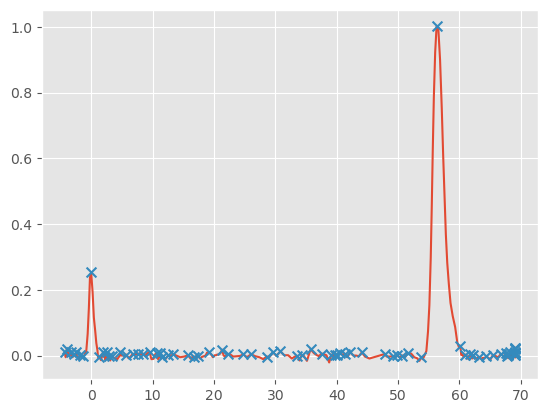

In [17]:
peaks, properties = find_peaks(y_data)

plt.plot(x_data, y_data, zorder=1)
plt.scatter(x_data[peaks], y_data[peaks], s=50, c="C1", marker="x", zorder=2)

Per trovarli però bisognerà aiutarlo con qualche informazione, per esempio _height_ per specificare l'altezza minima richiesta oppure _prominence_. Usando `width=(None, None)` inoltre avremo tutte le informazioni utili in _properties_.[Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.find_peaks.html)

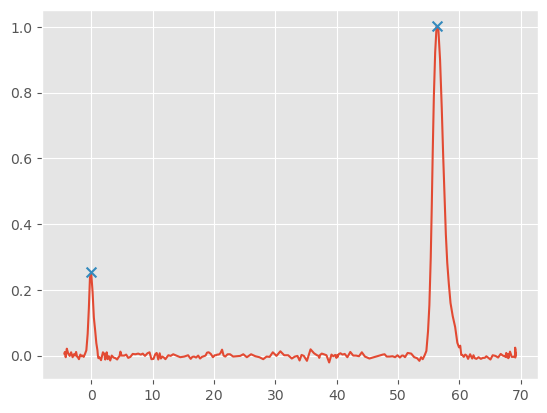

In [18]:
peaks, properties = find_peaks(y_data, height=0.2, width=(None, None))

plt.plot(x_data, y_data, zorder=1)
plt.scatter(x_data[peaks], y_data[peaks], s=50, c="C1", marker="x", zorder=2)

In [19]:
properties

{'peak_heights': array([0.253, 1.001]),
 'prominences': array([0.264, 1.013]),
 'left_bases': array([ 13, 137], dtype=int64),
 'right_bases': array([137, 222], dtype=int64),
 'widths': array([4.23076923, 8.6788522 ]),
 'width_heights': array([0.121 , 0.4945]),
 'left_ips': array([ 20.70512821, 182.21698113]),
 'right_ips': array([ 24.93589744, 190.89583333])}

Ricordate l'integrale calcolato con il metodo dei trapezi? Bene ci sono metodi più evoluti per effettuare l'integrazione numerica... Uno di questi è sicuramente il metodo simpson, implementato in `scipy.integrate.simpson()`. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.simpson.html)

In [20]:
print(f"Metodo dei Trapezi = {trapezoid}")

simp = simpson(y_data[mask], x_data[mask])
print(f"Metodo Simpson     = {simp}")

Metodo dei Trapezi = 2.1925416139999987
Metodo Simpson     = 2.1965247571464044


Ora ci buttiamo subito nei fit ai minimi quadrati ma prima un **disclaimer**.

Se avete dei dati con errore nella _variabile indipendente_ (o asse delle x) e volete effettuare un fit tenendolo in considerazione allora `scipy.optimize.curve_fit()` non fa più a caso vostro. Dovrete usare un altro metodo di fitting, chiamato [**Total Least Square**](https://en.wikipedia.org/wiki/Total_least_squares) basato sull'ottimizzazione di distanze "ortogonali". Fortunatamente SciPy è dotato di una semplice implementazione, accessibile da `scipy.odr`, che però non tratteremo in questo corso. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/reference/odr.html)

# **Esempio 3:** Analisi Dati di Laboratorio con Fit

L'obiettivo di questo esempio è di effettuare un fit ai minimi quadrati e una tipica analisi di laboratorio usando la funzione `scipy.optimize.curve_fit()`. [Clicca qui per più informazioni.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

Come prima cosa come sempre carichiamo i dati usando `np.loadtxt()`. Osserviamo però che i dati nelle x non sono in ordine. Questo può causare problemi successivamente quindi conviene ordinarli.

In [21]:
x_malus, y_malus, delta = np.loadtxt(
    "data/dati_malus.txt", delimiter=",", skiprows=1, unpack=True
)

x_malus

array([  0. , -20. , -30. , -40. , -50. , -60. , -70. , -80. , -90. ,
        20. ,  30. ,  40. ,  50. ,  60. ,  70. ,  80. ,  90. ,   5. ,
        -5. ,  10. , -10. , -15. ,  15. ,   2.5,  -2.5,   7.5,  -7.5])

Per ordinarli usiamo l'**indexing** di NumPy. Usiamo `np.argsort()` per ottenere l'array di indici rispetto all'asse delle x. Ora però dobbiamo riordinare le y allo stesso modo per avere gli stessi dati. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.argsort.html)

In [22]:
order = np.argsort(x_malus)

x_malus = x_malus[order]
y_malus = y_malus[order]
delta = delta[order]

Possiamo finalmente plottare i nostri dati per osservarli.

<ErrorbarContainer object of 3 artists>

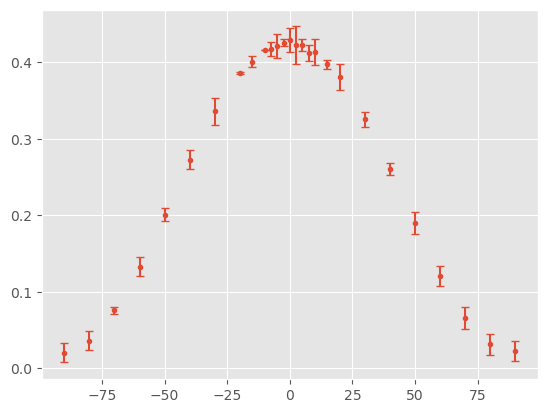

In [23]:
plt.errorbar(x_malus, y_malus, yerr=delta, fmt="o", ms=3, capsize=3)

Per prima cosa per un buon fit dobbiamo creare la funzione interessata. L'importante è che il primo argument della funzione deve essere la x.

In [24]:
def cos_2(x, a, b):
    return a * np.cos(x * np.pi / 180) ** 2 + b

Per effettuare il fit quindi indichiamo la funzione, i dati delle x e delle y e gli errori. Il kwarg *absolute_sigma=True* serve perché di default SciPy considera gli errori come relativi. Il kwarg _p0_ invece serve come parametro iniziale del fit. È importante quando si hanno fit complicati giocare un po' con questo parametro!

In [25]:
popt, pcov = curve_fit(
    cos_2, x_malus, y_malus, sigma=delta, absolute_sigma=True, p0=(0.4, 0.1)
)

I risultati del fit sono un array chiamato _popt_ che corrisponde ai valori best e la matrice delle covariance _pcov_, gli errori si possono ottenere dalla radice quadrata della diagonale.

In [26]:
perr = np.sqrt(np.diag(pcov))
print(f"a = {popt[0]} ± {perr[0]}")
print(f"b = {popt[1]} ± {perr[1]}")

a = 0.3994136928496285 ± 0.0035874985510253353
b = 0.028652699661907994 ± 0.003473548701452476


Anche qui controlliamo i risultati del fit e facciamo un bel grafico!

(-100.0, 100.0)

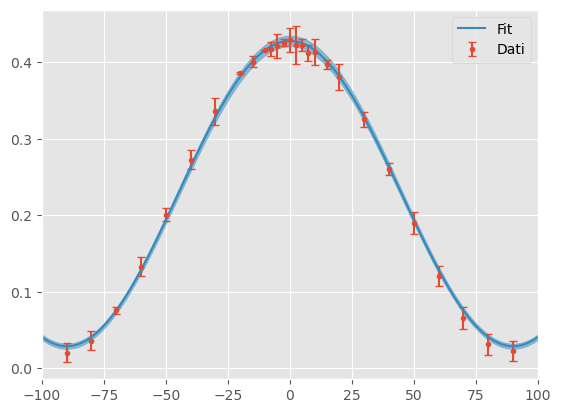

In [27]:
plt.errorbar(
    x_malus, y_malus, yerr=delta, fmt="o", c="C0", ms=3, capsize=3, label="Dati"
)

values = np.linspace(-100, 100, 1000)
plt.plot(values, cos_2(values, *popt), c="C1", label="Fit")

y_max = cos_2(values, *(popt + perr))
y_min = cos_2(values, *(popt - perr))
plt.fill_between(values, y_min, y_max, color="C1", alpha=0.5)

plt.legend()
plt.xlim(-100, 100)

# **Esempio 4:** Simulazione Random Walk

In un **Random Walk** unidimensionale una particella ad ogni istante temporale sceglie se muoversi a destra o sinistra a passi discreti (movimenti di $-1$ o $+1$). L'obiettivo è quello di trovare una _time series_ cioè la posizione della particella in funzione del tempo. Se si studiano le time series di un insieme di particelle indipendenti si trova che la **varianza** della serie temporale aumenta linearmente con il tempo.

Come prima cosa anche qua generiamo le nostre scelte con `Generator.choice()`, la scelta è tra $-1$ e $+1$. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html)

In [28]:
time = 1_000_000

single_walk = rng.choice([-1, 1], time)
single_walk

array([ 1,  1, -1, ..., -1,  1, -1])

Una idea iniziale potrebbe essere quella di iterare su ogni scelta fatta (gli _ndarray_ sono iterabili!) e sommarli mano a mano a una variabile e tenerli in memoria dentro una lista.

In [29]:
# %%timeit
tot_dist = 0
dist = []
for el in single_walk:
    tot_dist += el
    dist.append(tot_dist)

Questo approccio è sicuramente corretto come possiamo osservare ma se proviamo a cronometrarlo con il **magic command** `%timeit` vedremo che questo approccio è lentuccio. [Clicca qui per più informazioni.](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-timeit)

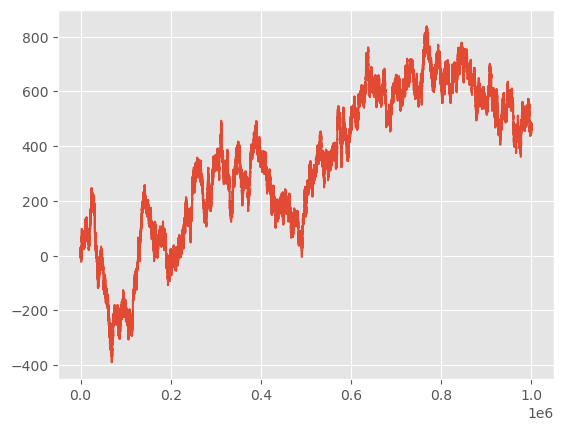

In [30]:
plt.plot(dist)

Un approccio alternativo è usare la funzione `np.cumsum()` che effettua la stessa cosa ed è estremamente più veloce. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html)

In [31]:
# %%timeit
np.cumsum(single_walk)

array([  1,   2,   1, ..., 464, 465, 464])

Con questo _one-liner_ si controlla prima che i due array trovati siano identici per ogni elemento e con la funzione `np.all()` si è sicuri che per ogni elemento abbiamo avuto come risposta _True_. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.all.html)

In [32]:
(single_walk.cumsum() == dist).all()

True

Ok! Ora vogliamo fare questa operazione per un certo numero di ripetizioni *n_rep* per un certo intervallo temporale _time_ quindi creiamo le scelte in una matrice con *n_rep* righe e _time_ colonne.

In [33]:
time = 1000
n_rep = 100

all_choices = rng.choice([-1, 1], (n_rep, time))
all_choices

array([[ 1, -1,  1, ..., -1, -1, -1],
       [ 1, -1, -1, ...,  1, -1,  1],
       [-1,  1,  1, ...,  1,  1,  1],
       ...,
       [-1, -1,  1, ...,  1,  1,  1],
       [-1, -1, -1, ..., -1,  1,  1],
       [-1, -1, -1, ..., -1, -1, -1]])

Spesso nelle funzioni di NumPy si può specificare _axis_ che indica se l'operazione va effettuata su un particolare asse. Siccome le somme vanno fatte sulle righe specifichiamo l'asse corrispondente al tempo cioè l'**asse 1**.

In [34]:
walks = np.cumsum(all_choices, axis=1)
walks

array([[  1,   0,   1, ..., -12, -13, -14],
       [  1,   0,  -1, ...,  -6,  -7,  -6],
       [ -1,   0,   1, ...,  48,  49,  50],
       ...,
       [ -1,  -2,  -1, ...,  26,  27,  28],
       [ -1,  -2,  -3, ..., -44, -43, -42],
       [ -1,  -2,  -3, ..., -10, -11, -12]])

A questo punto si può fare un plot per ognuno di queste _time-series_. `plt.axhline()` inserisce solo una riga orizzontale per tutto lo schermo. [Clicca qui per più informazioni.](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html)

(0.0, 1000.0)

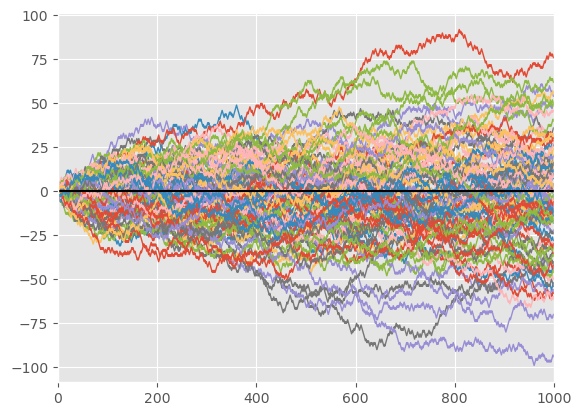

In [35]:
for w in walks:
    plt.plot(w, lw=1)
plt.axhline(0, c="k")
plt.xlim(0, time)

A questo punto calcoliamo la varianza in funzione del tempo con `np.var()` questa volta specificando l'asse relativo alle varie serie differenti cioè l'**asse 0**. [Clicca qui per più informazioni.](https://numpy.org/doc/stable/reference/generated/numpy.var.html)

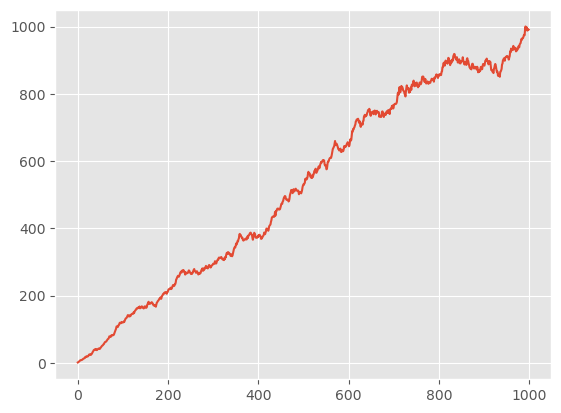

In [36]:
t = np.arange(time)
var = np.var(walks, axis=0)

plt.plot(t, var)

Effettuiamo un fit lineare come fatto in precedenza e plottiamo per osservare che l'andamento è in effetti proprio lineare.

In [37]:
def linear(x, a, b):
    return a * x + b

popt, pcov = curve_fit(linear, t, var)
err = np.sqrt(np.diag(pcov))
print(my_val := f"a = {popt[0]:.4f} ± {err[0]:.4f}\nb = {popt[1]:.2f} ± {err[1]:.2f}")

a = 1.0224 ± 0.0042
b = 12.98 ± 2.40


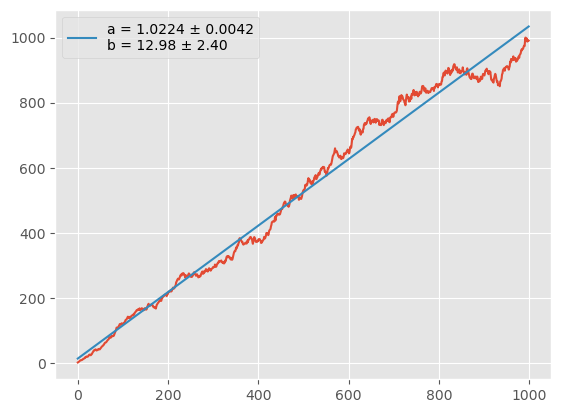

In [38]:
plt.plot(t, var)
plt.plot(t, linear(t, *popt), label=my_val)
plt.legend()